In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [4]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation="relu", name ='layer_one'),
    Dense(16, activation="relu"),
    Dense(10, activation="softmax")
])


In [5]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_one (Dense)            (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [36]:
# Build the Sequential convolutional neural network model
# input_shape=(1,28,28) --> need to specify number of channels
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])


In [37]:
# Print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [38]:
# Define the model optimizer, loss function and metrics
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
             loss = tf.keras.losses.sparse_categorical_crossentropy,
             metrics=[acc, mae])

In [39]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)

<function sparse_categorical_crossentropy at 0x7fa53c81a048>
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7fa45444eeb8>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7fa45444ed30>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [20]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [13]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [14]:
# Print the shape of the training data

train_images.shape

(60000, 28, 28)

In [15]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [16]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images/ 255.0
test_images = test_images/ 255.0

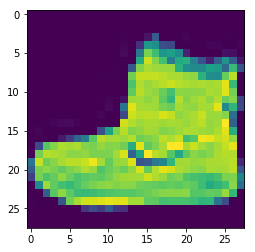

label:Ankle boot


In [25]:
# Display one of the images
i = 0 
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f'label:{labels[train_labels[i]]}')

In [45]:
train_images[...,np.newaxis].shape, train_images[:,:,:,None].shape, train_images[:,:,:,np.newaxis].shape

((60000, 28, 28, 1), (60000, 28, 28, 1), (60000, 28, 28, 1))

#### Fit the model

In [40]:
# Fit the model

#train_images[...,np.newaxis]  --> add dummy dimension for image channel
history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256)


Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 53s 880us/sample - loss: 0.5520 - sparse_categorical_accuracy: 0.8052 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 [==============================] - 52s 858us/sample - loss: 0.3572 - sparse_categorical_accuracy: 0.8731 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 [==============================] - 51s 843us/sample - loss: 0.3258 - sparse_categorical_accuracy: 0.8832 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 [==============================] - 51s 852us/sample - loss: 0.3147 - sparse_categorical_accuracy: 0.8867 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 [==============================] - 50s 842us/sample - loss: 0.2990 - sparse_categorical_accuracy: 0.8927 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 [==============================] - 51s 843us/sample - loss: 0.2902 - sparse_categorical_accuracy: 0.8958 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 [============

#### Plot training history

In [41]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.551973,0.805217,4.420000
1,0.357192,0.873067,4.420000
2,0.325779,0.883233,4.420001
3,0.314675,0.886750,4.420002
4,0.299043,0.892717,4.420001


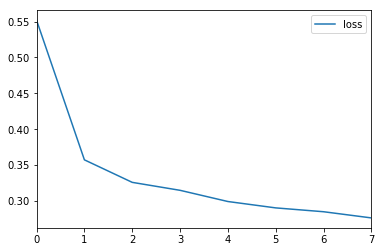

In [42]:
# Make a plot for the loss
df.plot(y='loss')


In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [49]:
# Evaluate the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)


10000/1 - 5s - loss: 0.2781 - sparse_categorical_accuracy: 0.8835 - mean_absolute_error: 4.4200


#### Make predictions from the model

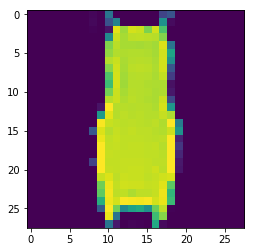

Label: Dress


In [51]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [55]:
# Get the model predictions

# add dummy dimensions for batch number and channel
model.predict(test_image[np.newaxis, ..., np.newaxis])
# idem : model.predict(test_image[np.newaxis, :,:, np.newaxis])

array([[7.4484420e-04, 1.1803920e-04, 9.3228002e-05, 9.9871325e-01,
        7.8564495e-05, 7.6171796e-07, 2.1842003e-04, 2.2893757e-06,
        1.3098491e-05, 1.7455855e-05]], dtype=float32)

In [56]:
labels[np.argmax(model.predict(test_image[np.newaxis, ..., np.newaxis]))]

'Dress'